In [1]:
using DataFrames, Plots
# load data
train = readtable("train_input.csv");
test = readtable("test_input.csv");

# least squares regression

In [16]:
X = convert(Array, train[1:size(train, 1), 6:(size(train, 2) - 1)]);
y = convert(Array, train[1:size(train, 1), end:end]);
# least squares regression
w = X\y

4×1 Array{Float64,2}:
  0.158394 
 -0.117322 
  0.0313936
 -0.0308813

In [17]:
testX = convert(Array, test[1:size(test, 1), 6:(size(test, 2) - 1)]);
testy = convert(Array, test[1:size(test, 1), end:end]);
test_pred = sign.(testX*w);

In [18]:
error_rate = sum(abs.(test_pred - testy) / 2.0) / size(testX,1)
squared_error = sum(abs2(test_pred - sign.(testy)))
println(error_rate)
println(squared_error)

0.3231197771587744
464.0


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs2(::Array{Float64,2}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/yugu/.julia/v0.6/Compat/src/Compat.jl:478
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/yugu/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/yugu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[18], in expression starting on line 2


## ridge regression

In [19]:
function ridge(lambda::Number)
    part1 = transpose(X)*X
    part1 = part1 + (lambda * eye(size(part1,1)))
    w_ridge = inv(part1) * transpose(X) * y
    pred = X*w_ridge
    squared_error = sum(abs2(pred - sign.(y)))
    return squared_error
end

ridge (generic function with 1 method)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs2(::Array{Float64,2}) at ./deprecated.jl:57
 [3] ridge(::Float64) at ./In[19]:6
 [4] collect(::Base.Generator{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},#ridge}) at ./array.jl:441
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /Users/yugu/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/yugu/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /Users/yugu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[20], in expression starting on line 2
INFO: Recompiling stale cache file /Users/yugu/.julia/lib/v0.6/PyPlot.ji for module PyPlot.



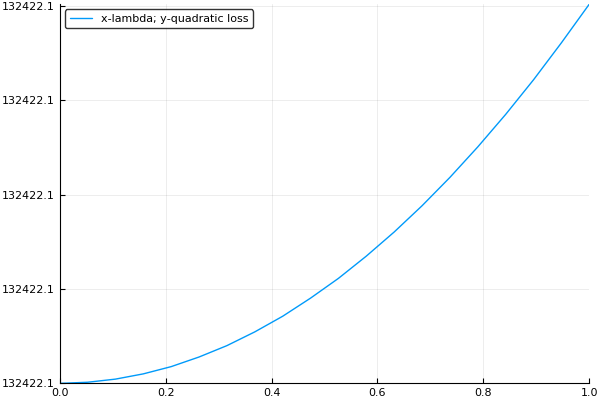

In [20]:
ls = linspace(0,1,20)
losses = [ridge(a) for a in ls]
min_val, min_index = findmin(losses)
final_lambda = ls[min_index]
plot(ls, losses, label="x-lambda; y-quadratic loss")

In [23]:
part1 = transpose(X)*X
part1 = part1 + (final_lambda * eye(size(part1,1)))
w_ridge = inv(part1) * transpose(X) * y
test_pred = sign.(testX*w_ridge)
error_rate = sum(abs.(test_pred - sign.(testy)) / 2.0) / size(testX,1)
squared_error = sum(abs2(test_pred - sign.(testy)))
println(error_rate)
println(squared_error)

0.3231197771587744
464.0


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs2(::Array{Float64,2}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/yugu/.julia/v0.6/Compat/src/Compat.jl:478
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/yugu/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/yugu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[23], in expression starting on line 6


# proximal gradient method for quadratic loss and l1 regularizer

In [24]:
function prox_l1(x::Number, alpha=1)
    if x > alpha
        return x-alpha
    elseif x < -alpha
        return x + alpha
    else
        return 0
    end
end
function prox_l1(x::AbstractArray, alpha=1)
    return reshape(Float64[prox_l1(xi, alpha) for xi in x], size(x))
end

prox_l1 (generic function with 4 methods)

In [25]:
# proximal gradient method for quadratic loss and l1 regularizer
function proxgrad_quad_l1(X, y; maxiters = 10, stepsize = 1, λ = 1, w = zeros(size(X,2)))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = 2X'*(X*w-y) # compute quadratic gradient
        z = w - stepsize*g
        # prox step
        w = prox_l1(z, stepsize*λ)
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1))
    end
    return w, objval
end

proxgrad_quad_l1 (generic function with 1 method)

In [27]:
w_prox, obj = proxgrad_quad_l1(X, y; maxiters = 50, stepsize = .1)
test_pred = sign.(testX*w_prox)
error_rate = sum(abs.(test_pred - sign.(testy)) / 2.0) / size(testX,1)
squared_error = sum(abs2(test_pred - sign.(testy)))
println(error_rate)
println(squared_error)

0.5069637883008357
728.0


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs2(::Array{Float64,2}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/yugu/.julia/v0.6/Compat/src/Compat.jl:478
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/yugu/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/yugu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[27], in expression starting on line 4
